# K-means & PCA assignment:

## Q2: Apply K means clustering to “credit card dataset: credit_card.csv”

In [9]:
#importing libraries and dataset
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('./credit card.csv')

### a. Remove any null values by the mean.

In [10]:
# checking null values
dataset.isna().sum()
dataset = dataset.fillna(dataset.mean())
dataset.drop('CUST_ID', axis=1, inplace=True)
dataset = dataset.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


### b. Use the elbow method to find a good number of clusters with the K-Means algorithm

In [11]:
#importing KMeans algorithm
# creating list to keep number of square and number of clusters
sq_list = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=300, random_state=816)
  kmeans.fit(dataset)
  sq_list.append(kmeans.inertia_)



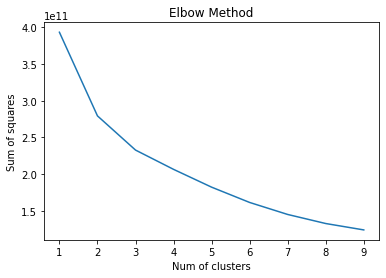

In [12]:
plt.plot(range(1,10), sq_list)
plt.title('Elbow Method')
plt.xlabel('Num of clusters')
plt.ylabel('Sum of squares')
plt.show()

### c. Calculate the silhouette score for the above clustering.


In [15]:
km = KMeans(n_clusters=3, random_state=913) 
km.fit(dataset)
cluster_kmeans = km.predict(dataset)

print(f"Score: {silhouette_score(dataset, cluster_kmeans)}")

Score: 0.4654852990070092


### d. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score?

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(dataset)
scaled_array = scaler.transform(dataset)
ds_scaled = pd.DataFrame(scaled_array, columns=dataset.columns)

km2 = KMeans(n_clusters=3, random_state=913) 
km2.fit(ds_scaled)
cluster_scaled = km2.predict(ds_scaled)

print(f"Score with scaling: {silhouette_score(dataset, cluster_scaled)}")

Score with scaling: 0.34184891351165964


### e. Apply PCA on the same dataset then apply K-Means algorithm on the PCA result and report your observation if the silhouette score improved or not.

In [19]:
pca2 = PCA(2) 
ds_pca = pca2.fit_transform(dataset)

km3 = KMeans(n_clusters=3, random_state=913)
km3.fit(ds_pca)
cluster_pca = km3.predict(ds_pca)

print(f"Score with PCA and no scaling: {silhouette_score(dataset, cluster_pca)}")

Score with PCA and no scaling: 0.47006546417792233


In [18]:
pca = PCA(2) 
ds_pca = pca.fit_transform(scaled_array)

km4 = KMeans(n_clusters=3, random_state=913)
km4.fit(ds_pca)
cluster_pca = km4.predict(ds_pca)

print(f"Score with PCA and scaling: {silhouette_score(dataset, cluster_pca)}")

Score with PCA and scaling: 0.33771408352313914
